I think the normalization of my shape noise covmat is wrong. I realized I can compare the analytic wp mat to my computed one to try to establish. 

In [15]:
import camb
pars = camb.CAMBparams()
from scipy.special import jn, jn_zeros
from camb import model, initialpower
from scipy.interpolate import interp1d
from hankel_transform import *
from astropy.cosmology import Planck13 #use Planck15 if you can
import astropy.units as u
#rc('text', usetex=False)

In [16]:
from matplotlib.pyplot import *
%matplotlib inline

In [17]:
#Set up a new set of parameters for CAMB
kmax=55#30
kmin=.8e-3
k_smooth=1
nk=5000
rmin=.055
rmax=110
non_linear=1

# wp  covariance

In [ ]:
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency

# replaced with DarkSky values
pars.set_cosmology(H0=70.4, ombh2=0.0231566, omch2=0.12293, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.967, r=0,As =2.18e-09)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
zb=[0.0]#[0.0]#
pars.set_matter_power(redshifts=zb,kmax=kmax);
if non_linear==1:
    pars.NonLinear = model.NonLinear_both
else:
    pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk =results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints =nk)

In [ ]:
HT=hankel_transform(rmin=rmin,rmax=rmax,kmax=kmax,j_nu=[0],n_zeros=60000,kmin=kmin)

('nr:', 1927)


In [ ]:
h = 0.704

In [ ]:
n_g=5e-4#3.e-4
g_shot_noise=1./n_g
b_g=1.838
p_g=b_g**2*pk[0]
#p_gk=b_g*pk[0]*rho

In [ ]:
r_bins=np.logspace(-1,1.6,19)#*h

In [ ]:
#vol=1000**3#vol.value
area = 1000**2

In [ ]:
taper_kw=dict({'large_k_lower':10,'large_k_upper':kmax,'low_k_lower':kmin,'low_k_upper':kmin*1.2})

In [ ]:
r,cov_gg=HT.projected_covariance(k_pk=kh,pk1=p_g+g_shot_noise,pk2=p_g+g_shot_noise,j_nu=0,taper=True,**taper_kw)
cov_gg*=2./area
r_re,cov_gg_re=HT.bin_cov(r=r,cov=cov_gg,r_bins=r_bins)
corr=HT.corr_matrix(cov=cov_gg_re)

#cov_gg_re/=area # Don't forget

In [ ]:
np.sqrt(np.diag(cov_gg_re))

In [ ]:
sim_covmat = np.load('/home/users/swmclau2/Git/pearce/bin/covmat/wp_ds_sim_covmat.npy')

In [ ]:
plot(r_re, r_re*np.sqrt(np.diag(cov_gg_re)) )
plot(r_re, r_re*np.sqrt(np.diag(sim_covmat[:18][:,:18])))
ylabel('Shape Noise Error')
xlabel('r [Mpc]')
loglog();

In [ ]:
print np.sqrt(np.diag(cov_gg_re))/ np.sqrt(np.diag(sim_covmat[:18][:,:18]))

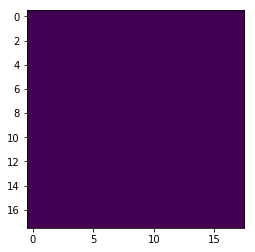

In [16]:
imshow(corr)

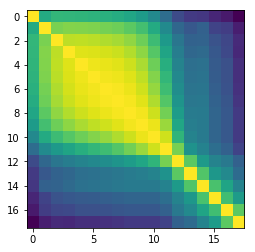

In [17]:
imshow(HT.corr_matrix( sim_covmat[:18][:,:18]) )

In [18]:
from glob import glob
from os import path
output_dir = '/home/users/swmclau2/Git/pearce/bin/covmat/ds14_covmat_v2/'
outputs = sorted(glob(path.join(output_dir, 'wp_ds_cic_darksky_obs_???_v2.npy')))
N = len(outputs)
all_outputs = np.zeros((N, 5,  2*18 + 14)) # num bins and num HODs 

In [19]:
for i,output_file in enumerate(outputs):
    output = np.load(output_file)

    all_outputs[i] = output#.mean(axis = 0)

In [31]:
wp_sim = all_outputs[0, 4, :18]

In [21]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [22]:
r_gg,wgg=HT.projected_correlation(k_pk=kh,pk=pk[0]*b_g**2,j_nu=0)

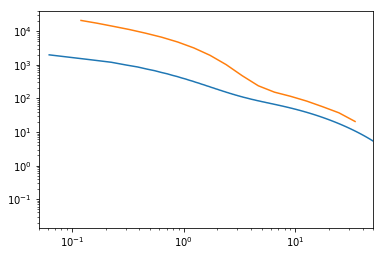

In [32]:
plot(r_gg/h, wgg)
plot(rbc, wp_sim)
xlim([0.05, 50])
loglog();

In [24]:
r_gg.shape

(1927,)